In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.shape

(7043, 21)

We have 7043 rows and 21 columns.

In [4]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Here, we have int type values in senior citizen and tenure columns, float type values in monthly charges column and object type values are present in rest of the other columns.

# To check missing values

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Here, we have no missing values.

<AxesSubplot:>

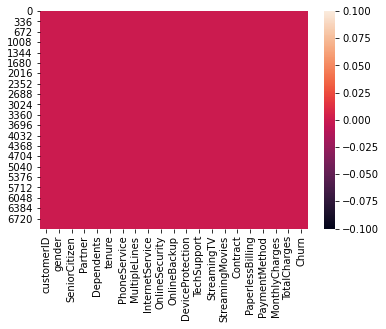

In [6]:
sns.heatmap(df.isnull())

# Summary Statistics

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


The mean is higher than median in senior citizen and tenure columns where as median is higher than mean in monthly charges column.

# To check correlation

In [8]:
dfcorr=df.corr()
dfcorr

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


<AxesSubplot:>

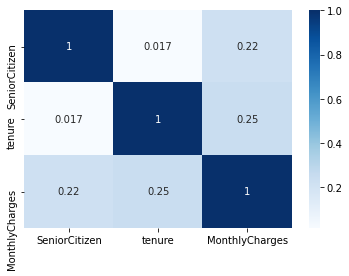

In [9]:
sns.heatmap(dfcorr,cmap='Blues',annot=True)

Here, monthly charges and tenure columns are positively correlated.

# EDA

<AxesSubplot:xlabel='Churn', ylabel='count'>

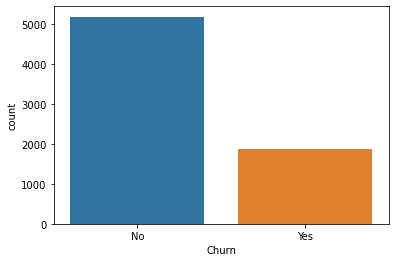

In [10]:
sns.countplot(df['Churn'])

Here, the target variable is imbalanced. Lets make it balanced before the model building.

In [11]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

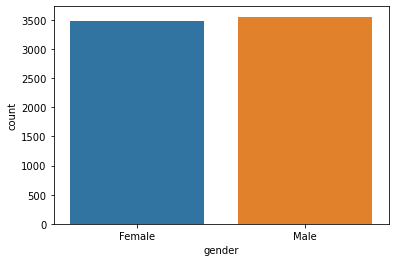

In [12]:
sns.countplot(df['gender'])

From the above observations, 3555 applicants are male and 3488 applicants are female.

<AxesSubplot:xlabel='Partner', ylabel='count'>

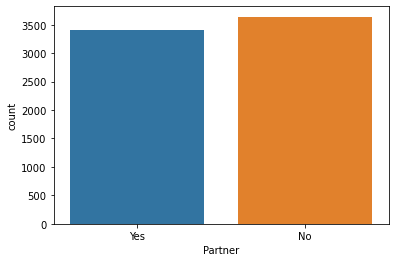

In [13]:
sns.countplot(df['Partner'])

From the above observations, the applicants who are having partner are 3402 and the applicants who are not having partner are 3641.

<AxesSubplot:xlabel='Dependents', ylabel='count'>

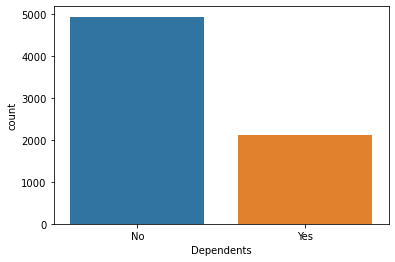

In [14]:
sns.countplot(df['Dependents'])

From the above observations, the applicants who are dependent are 2110 and not dependent are 4933.

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

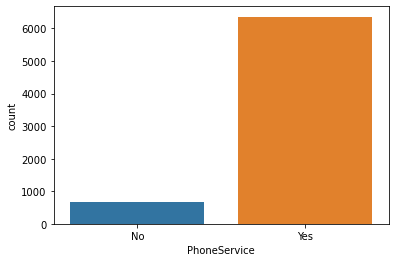

In [15]:
sns.countplot(df['PhoneService'])

From the above observations,, the applicants who are having phone service are 6361 and not having phone service are 682.

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

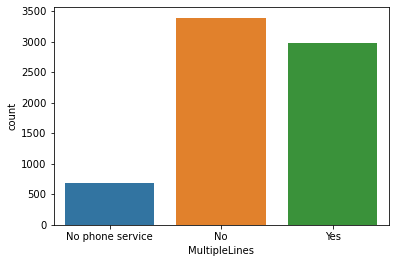

In [16]:
sns.countplot(df['MultipleLines'])

From the above observations, the applicants who are having multiple lines are 2971 and not having multiple lines are 3390.

<AxesSubplot:xlabel='InternetService', ylabel='count'>

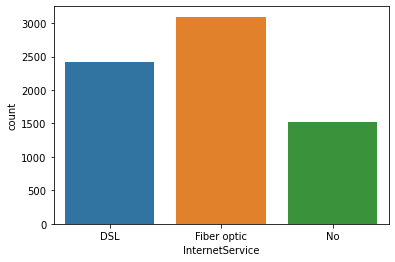

In [17]:
sns.countplot(df['InternetService'])

From the above observations, the applicants who are having DSL internet service are 2421, Fiber optic internet service are 3096 and not having any internet service are 1526.

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

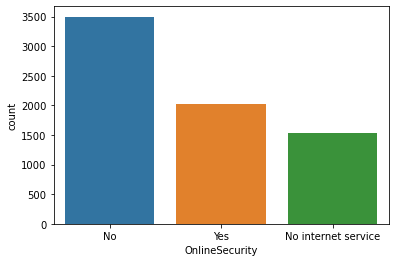

In [18]:
sns.countplot(df['OnlineSecurity'])

From the above observations, the applicants who are having online security are 2019 and not having online security are 3498. The applicants who are not having internet service are 1526.

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

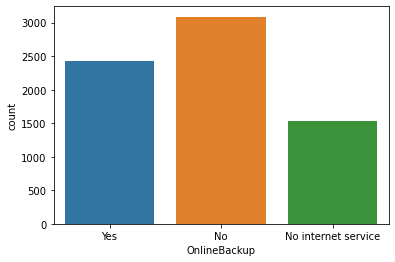

In [19]:
sns.countplot(df['OnlineBackup'])

From the above observations, the applicants who are having online backup are 2429 and not having online backup are 3088. The applicants who are not having internet service are 1526.

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

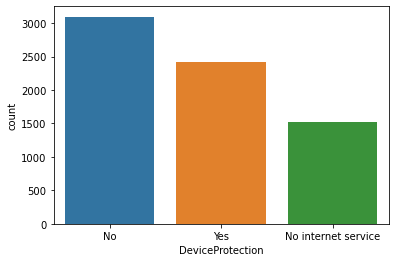

In [20]:
sns.countplot(df['DeviceProtection'])

From the above observations, the applicants who are having device protection are 2422 and not having device protection are 3095. The applicants who are not having internet service are 1526.

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

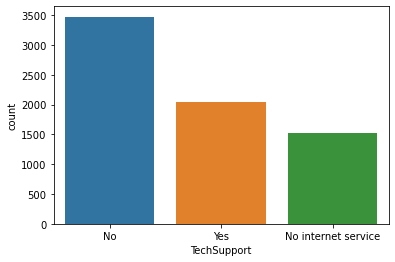

In [21]:
sns.countplot(df['TechSupport'])

From the above observations, the applicants who are having tech support are 2044 and not having tech support are 3473. The applicants who are not having internet service are 1526.

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

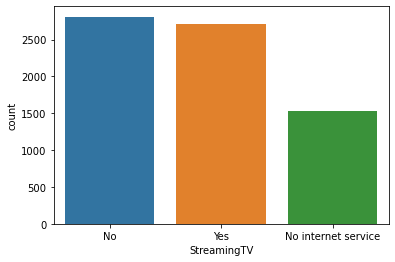

In [22]:
sns.countplot(df['StreamingTV'])

From the above observations, the applicants who can stream TV are 2707 and who can not stream TV are 2810. The applicants who are not having internet service are 1526.

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

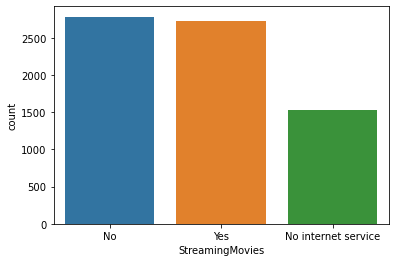

In [23]:
sns.countplot(df['StreamingMovies'])

From the above observations, the applicants who can stream movies are 2732 and who can not stream movies are 2785. The applicants who are not having internet service are 1526.

<AxesSubplot:xlabel='Contract', ylabel='count'>

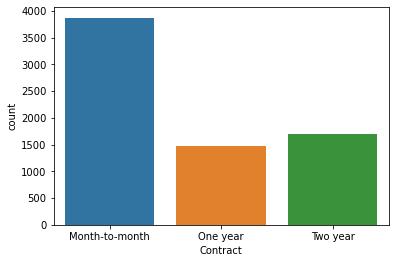

In [24]:
sns.countplot(df['Contract'])

From the above observations, the applicants who are having one year contract are 1473, two year contract are 1695 and month-to-month contract are 3875.

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

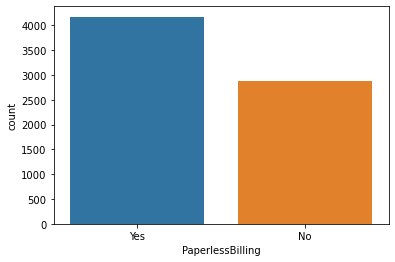

In [25]:
sns.countplot(df['PaperlessBilling'])

From the above observations, the applicants who are having paper less billing are 4171 and not having paper less billing are 2872.

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

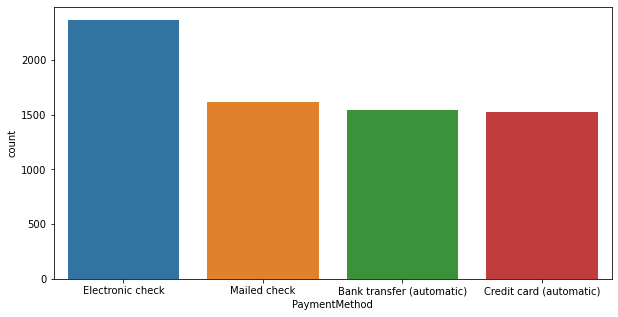

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(df['PaymentMethod'])

From the above observations in payment method, the applicants who are having electronic check are are 2365, mailed check are 1612, bank transfer(automatic) 1544, credit card (automatic) are 1522.

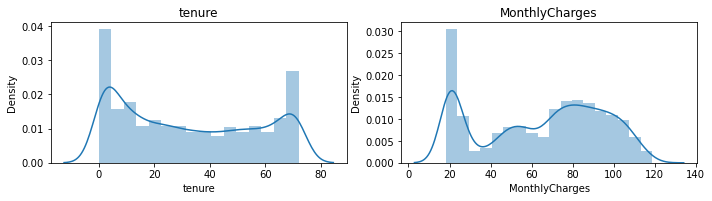

In [27]:
k=['tenure','MonthlyCharges']
j=1
plt.figure(figsize=(10,5))
for i in k:
    plt.subplot(2,2,j)
    sns.distplot(df[i])
    plt.title(i)
    j=j+1
plt.tight_layout()  

Datas are distributed normally in the two columns.

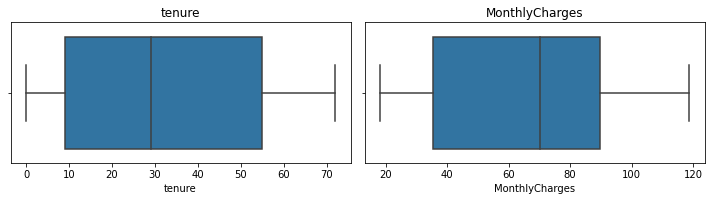

In [28]:
k=['tenure','MonthlyCharges']
j=1
plt.figure(figsize=(10,5))
for i in k:
    plt.subplot(2,2,j)
    sns.boxplot(df[i])
    plt.title(i)
    j=j+1
plt.tight_layout()  

There are no outilers present in the two columns.

In [29]:
y=df[['Churn']]

In [30]:
df.drop('Churn',axis=1,inplace=True)

In [31]:
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
dtype: float64

Here, we can say that there is no skewness present in tenure and monthly charges columns as the senior citizen column is a categorical one.

In [32]:
df_new=df.copy(deep=True)

In [33]:
df_new.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
dtype: float64

In [34]:
df_new

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6


In [35]:
df_new['Churn']=y['Churn']
df_new

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [36]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_new.drop('customerID',axis=1,inplace=True)
df_new['gender']=le.fit_transform(df_new['gender'])
df_new['Partner']=le.fit_transform(df_new['Partner'])
df_new['Dependents']=le.fit_transform(df_new['Dependents'])
df_new['PhoneService']=le.fit_transform(df_new['PhoneService'])
df_new['MultipleLines']=le.fit_transform(df_new['MultipleLines'])
df_new['InternetService']=le.fit_transform(df_new['InternetService'])
df_new['OnlineSecurity']=le.fit_transform(df_new['OnlineSecurity'])
df_new['OnlineBackup']=le.fit_transform(df_new['OnlineBackup'])
df_new['DeviceProtection']=le.fit_transform(df_new['DeviceProtection'])
df_new['TechSupport']=le.fit_transform(df_new['TechSupport'])
df_new['StreamingTV']=le.fit_transform(df_new['StreamingTV'])
df_new['StreamingMovies']=le.fit_transform(df_new['StreamingMovies'])
df_new['Contract']=le.fit_transform(df_new['Contract'])
df_new['PaperlessBilling']=le.fit_transform(df_new['PaperlessBilling'])
df_new['PaymentMethod']=le.fit_transform(df_new['PaymentMethod'])
df_new['Churn']=le.fit_transform(df_new['Churn'])
df_new

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.5,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.5,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.9,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.6,1


Here, I have dropped customer ID column since it is not adding any pattern to the target variable.

In [37]:
from sklearn.utils import resample

In [38]:
train_positive=df_new[df_new['Churn']==1]
train_negative=df_new[df_new['Churn']==0]

# Upsample minority class
train_positive_upsample=resample(train_positive,replace=True,n_samples=5174,random_state=18)

# Combine majority class with upsampled minority class
df1=pd.concat([train_negative,train_positive_upsample])

# Display new class counts
df1['Churn'].value_counts()

1    5174
0    5174
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

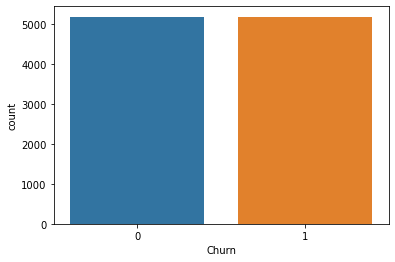

In [39]:
sns.countplot(df1['Churn'])

Here, the target variable is balanced after adding copies to the minority class.

In [40]:
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.5,0
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
6,1,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,89.10,1949.4,0
7,0,0,0,0,10,0,1,0,2,0,0,0,0,0,0,0,3,29.75,301.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144,1,0,0,0,1,0,1,0,0,0,0,0,0,2,0,1,2,35.55,35.55,1
462,1,0,1,1,4,1,2,1,0,0,2,0,2,2,0,0,2,101.15,385.9,1
3815,0,0,0,0,3,1,2,1,0,0,0,0,0,0,0,1,2,74.25,210.3,1
905,1,1,0,0,9,1,2,1,0,0,2,0,2,2,0,1,2,100.50,918.6,1


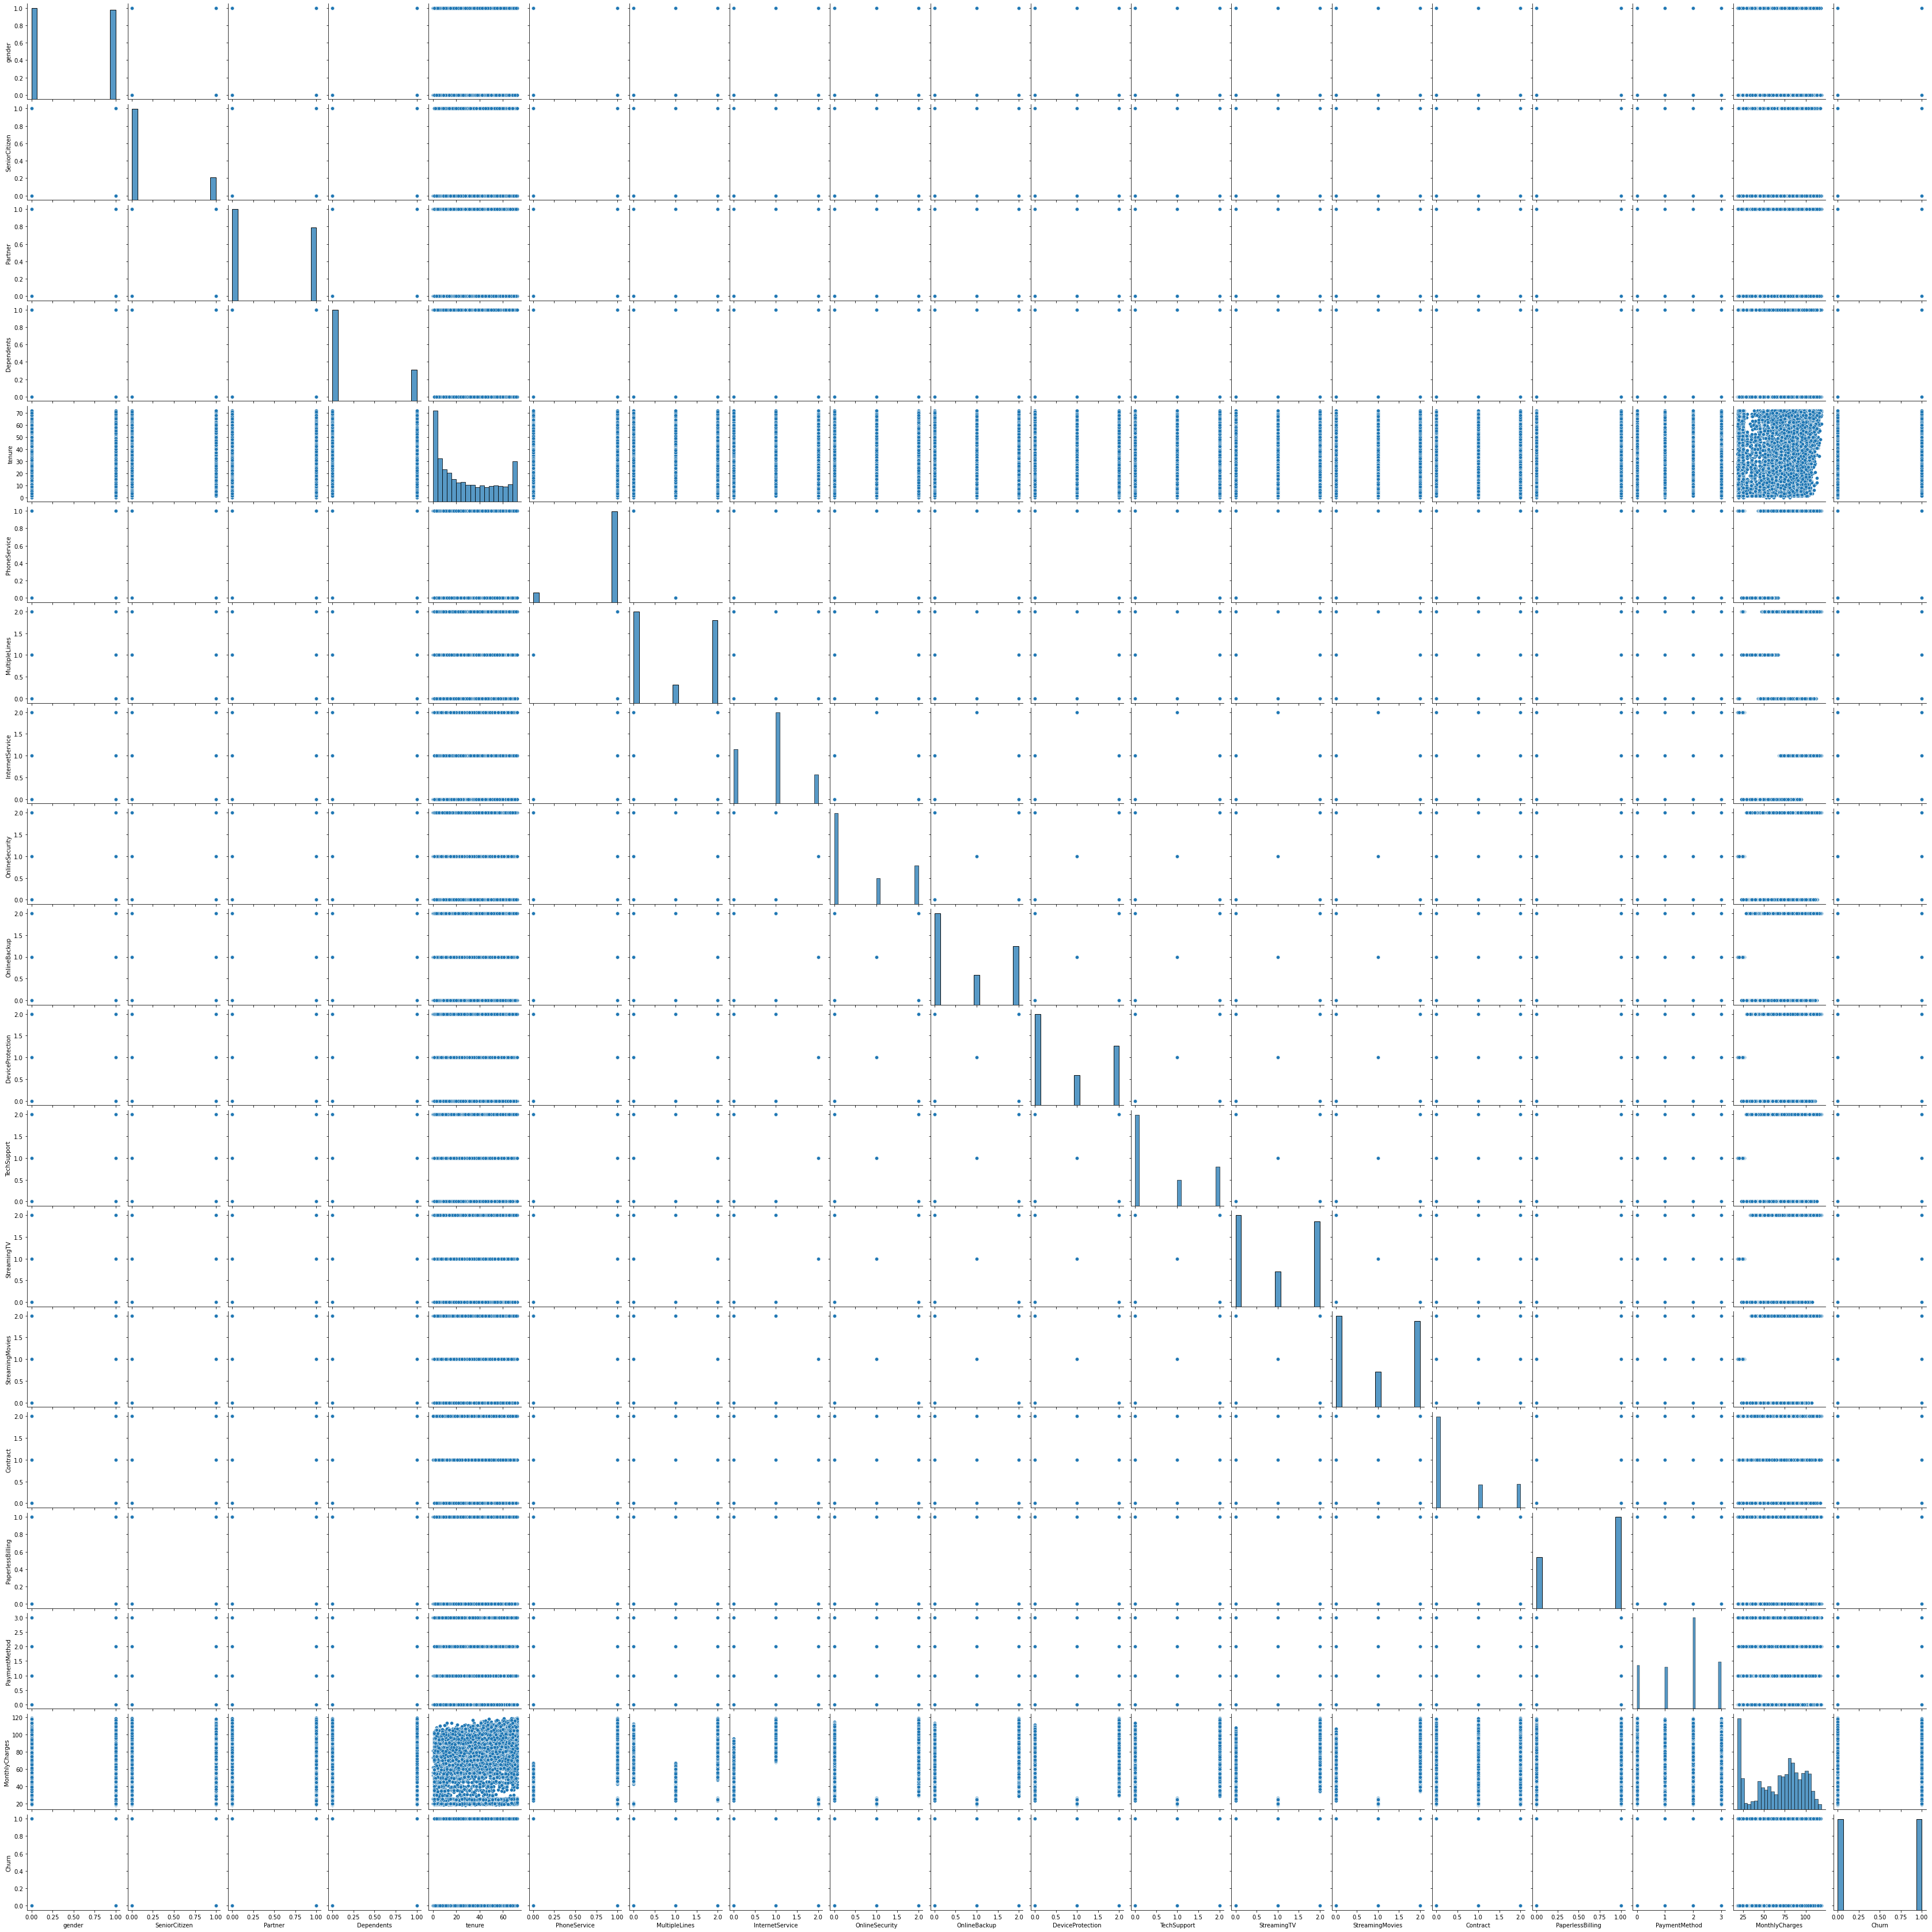

In [41]:
sns.pairplot(df1)

<AxesSubplot:xlabel='tenure', ylabel='Count'>

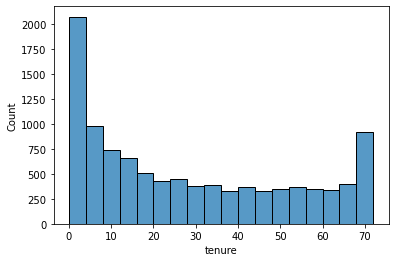

In [42]:
sns.histplot(df1['tenure'])

The plot is normally distributed without any skewness.

In [43]:
df1.drop(['SeniorCitizen','TotalCharges'],axis=1,inplace=True)

In [44]:
df1

,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,0
1,1,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,0
3,1,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,0
6,1,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,89.10,0
7,0,0,0,10,0,1,0,2,0,0,0,0,0,0,0,3,29.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144,1,0,0,1,0,1,0,0,0,0,0,0,2,0,1,2,35.55,1
462,1,1,1,4,1,2,1,0,0,2,0,2,2,0,0,2,101.15,1
3815,0,0,0,3,1,2,1,0,0,0,0,0,0,0,1,2,74.25,1
905,1,0,0,9,1,2,1,0,0,2,0,2,2,0,1,2,100.50,1


In [45]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
z

array([[0.98999975, 1.11915292, 0.58746825, ..., 0.35983495, 1.32130066,
        1.        ],
       [1.01010127, 0.89353294, 0.58746825, ..., 1.33946455, 0.38164591,
        1.        ],
       [1.01010127, 0.89353294, 0.58746825, ..., 1.59942424, 0.88961425,
        1.        ],
       ...,
       [0.98999975, 0.89353294, 0.58746825, ..., 0.35983495, 0.2182075 ,
        1.        ],
       [1.01010127, 0.89353294, 0.58746825, ..., 0.35983495, 1.12838968,
        1.        ],
       [0.98999975, 1.11915292, 1.70221967, ..., 1.59942424, 0.57014461,
        1.        ]])

In [46]:
print(np.where(z>3))

(array([    0,     2,     4,    44,    61,    68,    79,    80,    82,
          87,    89,    99,   139,   157,   159,   163,   164,   165,
         171,   179,   193,   196,   198,   207,   225,   238,   241,
         244,   258,   276,   280,   284,   286,   296,   316,   322,
         325,   340,   350,   365,   427,   448,   465,   469,   480,
         499,   500,   514,   538,   540,   552,   577,   584,   589,
         594,   598,   610,   621,   630,   633,   643,   646,   653,
         654,   659,   683,   697,   703,   705,   718,   750,   755,
         770,   779,   790,   820,   827,   848,   850,   866,   874,
         893,   903,   918,   926,   937,   944,   961,   968,   978,
         982,   984,   987,   993,   996,  1014,  1034,  1041,  1070,
        1088,  1089,  1090,  1104,  1109,  1150,  1151,  1164,  1167,
        1190,  1195,  1204,  1207,  1216,  1244,  1247,  1254,  1270,
        1322,  1332,  1333,  1346,  1351,  1364,  1372,  1388,  1394,
        1395,  1397

In [47]:
df2=df1[(z<3).all(axis=1)]
df2

,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
1,1,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,0
6,1,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,89.10,0
9,1,0,1,62,1,0,0,2,2,0,0,0,0,1,0,0,56.15,0
10,1,1,1,13,1,0,0,2,0,0,0,0,0,0,1,3,49.95,0
11,1,0,0,16,1,0,2,1,1,1,1,1,1,2,0,1,18.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2707,1,0,0,3,1,0,1,0,0,2,2,2,2,0,1,2,98.70,1
462,1,1,1,4,1,2,1,0,0,2,0,2,2,0,0,2,101.15,1
3815,0,0,0,3,1,2,1,0,0,0,0,0,0,0,1,2,74.25,1
905,1,0,0,9,1,2,1,0,0,2,0,2,2,0,1,2,100.50,1


In [48]:
df1.shape

(10348, 18)

In [49]:
df2.shape

(9377, 18)

In [50]:
((10348-9377)/10348)*100

9.38345574023966

Here, 971 rows have been removed since there were outliers present in it.

In [51]:
x=df2.iloc[:,0:-1]
y=df2.iloc[:,-1]

In [52]:
x

,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
1,1,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95
6,1,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,89.10
9,1,0,1,62,1,0,0,2,2,0,0,0,0,1,0,0,56.15
10,1,1,1,13,1,0,0,2,0,0,0,0,0,0,1,3,49.95
11,1,0,0,16,1,0,2,1,1,1,1,1,1,2,0,1,18.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2707,1,0,0,3,1,0,1,0,0,2,2,2,2,0,1,2,98.70
462,1,1,1,4,1,2,1,0,0,2,0,2,2,0,0,2,101.15
3815,0,0,0,3,1,2,1,0,0,0,0,0,0,0,1,2,74.25
905,1,0,0,9,1,2,1,0,0,2,0,2,2,0,1,2,100.50


In [53]:
y

1       0
6       0
9       0
10      0
11      0
       ..
2707    1
462     1
3815    1
905     1
3666    1
Name: Churn, Length: 9377, dtype: int32

In [54]:
x.shape

(9377, 17)

In [55]:
y.shape

(9377,)

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [61]:
maxAcc=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.32,random_state=i)
    mod=DecisionTreeClassifier()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print('The best accuracy is',maxAcc,'on random state',maxRS)        

The best accuracy is 0.8767077640786405 on random state 86


In [63]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6376, 17)
(3001, 17)
(6376,)
(3001,)


In [64]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.7584138620459847
[[1080  412]
 [ 313 1196]]
              precision    recall  f1-score   support

           0       0.78      0.72      0.75      1492
           1       0.74      0.79      0.77      1509

    accuracy                           0.76      3001
   macro avg       0.76      0.76      0.76      3001
weighted avg       0.76      0.76      0.76      3001



In [65]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
pred=gnb.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.7544151949350216
[[1061  431]
 [ 306 1203]]
              precision    recall  f1-score   support

           0       0.78      0.71      0.74      1492
           1       0.74      0.80      0.77      1509

    accuracy                           0.75      3001
   macro avg       0.76      0.75      0.75      3001
weighted avg       0.76      0.75      0.75      3001



In [72]:
svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.740753082305898
[[1034  458]
 [ 320 1189]]
              precision    recall  f1-score   support

           0       0.76      0.69      0.73      1492
           1       0.72      0.79      0.75      1509

    accuracy                           0.74      3001
   macro avg       0.74      0.74      0.74      3001
weighted avg       0.74      0.74      0.74      3001



In [67]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.8507164278573809
[[1163  329]
 [ 119 1390]]
              precision    recall  f1-score   support

           0       0.91      0.78      0.84      1492
           1       0.81      0.92      0.86      1509

    accuracy                           0.85      3001
   macro avg       0.86      0.85      0.85      3001
weighted avg       0.86      0.85      0.85      3001



In [68]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.7914028657114295
[[1039  453]
 [ 173 1336]]
              precision    recall  f1-score   support

           0       0.86      0.70      0.77      1492
           1       0.75      0.89      0.81      1509

    accuracy                           0.79      3001
   macro avg       0.80      0.79      0.79      3001
weighted avg       0.80      0.79      0.79      3001



In [69]:
rf=RandomForestClassifier(n_estimators=150)
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.8747084305231589
[[1212  280]
 [  96 1413]]
              precision    recall  f1-score   support

           0       0.93      0.81      0.87      1492
           1       0.83      0.94      0.88      1509

    accuracy                           0.87      3001
   macro avg       0.88      0.87      0.87      3001
weighted avg       0.88      0.87      0.87      3001



These accuracy scores can be because of overfitting. Lets check with cross validation.

# Cross Validation

In [73]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lg,x,y,cv=5)
print(score)
print(score.mean())

[0.76439232 0.76439232 0.75573333 0.76693333 0.77013333]
0.7643169296375267


In [74]:
score=cross_val_score(gnb,x,y,cv=5)
print(score)
print(score.mean())

[0.76172708 0.75373134 0.7472     0.75786667 0.7552    ]
0.7551450177683013


In [75]:
score=cross_val_score(dtc,x,y,cv=5)
print(score)
print(score.mean())

[0.87579957 0.8630064  0.8736     0.86933333 0.88106667]
0.8725611940298507


In [76]:
score=cross_val_score(svc,x,y,cv=5)
print(score)
print(score.mean())

[0.73773987 0.75852878 0.73866667 0.74933333 0.74293333]
0.7454403980099502


In [77]:
score=cross_val_score(knn,x,y,cv=5)
print(score)
print(score.mean())

[0.80063966 0.81982942 0.81066667 0.80373333 0.81653333]
0.8102804832977967


In [78]:
score=cross_val_score(rf,x,y,cv=5)
print(score)
print(score.mean())

[0.89978678 0.90085288 0.8896     0.89493333 0.89973333]
0.8969812651030562


The least difference between the highest accuracy score and cross validation score says that random forest model is working better.

# Hyper Parameter Tuning

We use this technique to improve the accuracy of the best model that we have choosen.

In [79]:
from sklearn.model_selection import GridSearchCV
parameters={'n_estimators':[90,100,110],
            'criterion':['gini','entropy'],
            'max_depth':range(2,10,2),
            'min_samples_split':range(2,20,2),
            'max_features':['auto','sqrt','log2']}
gs=GridSearchCV(RandomForestClassifier(),parameters,cv=5)
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10, 2),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': range(2, 20, 2),
                         'n_estimators': [90, 100, 110]})

In [80]:
print(gs.best_params_)

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 110}


In [88]:
rfbestmodel=RandomForestClassifier(criterion='gini',max_features='sqrt',n_estimators=110,min_samples_split=2)
rfbestmodel.fit(x_train,y_train)
pred=rfbestmodel.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

87.97067644118627


# Saving the model

In [90]:
import joblib
joblib.dump(rf,'rfbestmodel.obj')

['rfbestmodel.obj']